1. 简介

kNN算法可以说是机器学习中最简单的一种算法了。它思想极其简单，应用数学知识很少，并且效果相对于它的复杂程度来说极其地好，许多问题都可以用它来解决。它的思想用上面的一张图就可以解释清楚。它的本质是让输入与给定的数据集进行距离的计算。如果最近的点大部分为某一类（比如说是A），则判定为A类。kNN中的k，就是跟输入比较的点的数量。这个是作为算法的一个参数。当然距离的计算方法有很多种，比如说欧拉距离

<img src='./images/oula.png'>


2. 算法说明

一个简单的场景：已知一个电影中的打斗和接吻镜头数，判断它是属于爱情片还是动作片。当接吻镜头数较多时，根据经验我们判断它为爱情片。那么计算机如何进行判别呢？
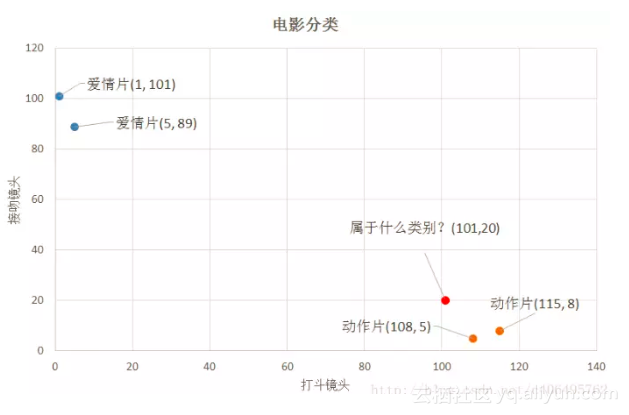

可以使用K近邻算法，其工作原理如下：

* 计算样本数据中的点与当前点之间的距离
* 算法提取样本最相似数据(最近邻)的分类标签
* 确定前k个点所在类别的出现频率. 一般只选择样本数据集中前k个最相似的数据，这就是k-近邻算法中k的出处，通常k是不大于20的整数
* 返回前k个点所出现频率最高的类别作为当前点的预测分类
电影分类场景中，k取值为3，按距离依次排序的三个点分别是动作片(108,5)、动作片(115,8)、爱情片(5,89)。在这三个点中，动作片出现的频率为三分之二，爱情片出现的频率为三分之一，所以该红色圆点标记的电影为动作片。

K近邻算法的一个常见应用是手写数字识别。手写字体对于人脑来说，看到的数字是一幅图像，而在电脑看来这是一个二维或三维数组，那怎么对数字进行识别?

使用K近邻算法的进行识别的具体步骤为：

* 首先将每个图片处理为具有相同的色彩和大小：宽高是32像素x32像素。
* 将3232的二进制图像矩阵转换成11024的测试向量。
* 将训练样本储存在训练矩阵中，创建一个m行1024列的训练矩阵，矩阵的每行数据存储一个图像。
* 计算目标样本与训练样本的距离，选择前k个点所出现频率最高的数字作为当前手写字体的预测分类。

下面通过一个简单的例子说明一下：如下图，绿色圆要被决定赋予哪个类，是红色三角形还是蓝色四方形？如果K=3，由于红色三角形所占比例为2/3，绿色圆将被赋予红色三角形那个类，如果K=5，由于蓝色四方形比例为3/5，因此绿色圆被赋予蓝色四方形类。

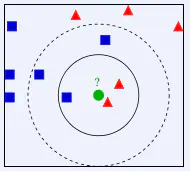

由此也说明了KNN算法的结果很大程度取决于K的选择。

3. 算法分布实现

    1. 准备数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def create_data():
    features=np.array([[2.88,3.05],[3.1,2.45],[3.05,2.8],[2.9,2.7],[2.75,3.4],[3.23,2.9],
                      [3.2,3.75],[3.5,2.9],[3.65,3.6],[3.35,3.3]])
    labels=['A','A','A','A','A','B','B','B','B','B']
    return features,labels
    

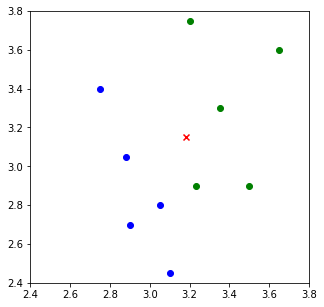

In [2]:
features,labels=create_data()
plt.figure(figsize=(5,5))
plt.xlim(2.4,3.8)
plt.ylim(2.4,3.8)
x=[ item[0] for item in features]
y=[ item[1] for item in features]

plt.scatter(x[:5],y[:5],c='b')
plt.scatter(x[5:],y[5:],c='g')
plt.scatter([3.18],[3.15],c='r',marker='x')

### annotation: blue dot category is A,red dot category is B and cross sign is unkown category.

2. 计算距离

    计算距离的方式有欧氏距离、曼哈顿距离

曼哈顿距离代码实现
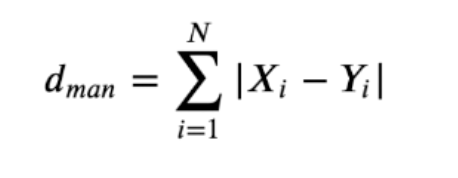

X,Y表示两个点，Xi 表示X的第i维数据

In [8]:
def dis_man(x,y):
    d=np.sum(np.abs(x-y))
    return d

In [9]:
#test

x=np.array([3.5,4.5])
y=np.array([4.8,4.5])

d=dis_man(x,y)
d

1.2999999999999998

欧氏距离
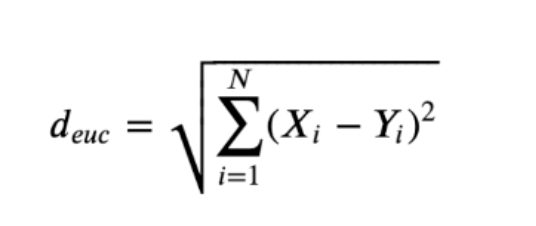

In [10]:
def dis_ou(x,y):
    d=np.sqrt(np.sum(np.square(x-y)))
    return d

In [11]:
d=dis_ou(x,y)
d

1.2999999999999998

In [14]:
x1=np.random.randn(10)
y1=np.random.randn(10)

d1=dis_ou(x1,y1)
d1

2.83519532236987

3. 寻找邻居

常用的决策规则
1. 多数表决法
2. 加权表决法

多数表决法

In [17]:
def majority_voting(class_count):
    '''
    class_count:type is dict
    '''
    sorted_class_count=sorted(
        class_count.items(),key=lambda item:item[1] ,reverse=True
    )
    
    return sorted_class_count

In [18]:
# test
arr={"A":2,"B":12,"C":6}

majority_voting(arr)


[('B', 12), ('C', 6), ('A', 2)]

#### knn 算法实现

In [53]:
# features=np.array([[2.88,3.05],[3.1,2.45],[3.05,2.8],[2.9,2.7],[2.75,3.4],[3.23,2.9],
#                       [3.2,3.75],[3.5,2.9],[3.65,3.6],[3.35,3.3]])
# labels=['A','A','A','A','A','B','B','B','B','B']
from collections import Counter
def knn_classify(test_data,train_data,labels,k):
    distances=np.array([])
    for each_data in train_data:
        d=dis_ou(test_data,each_data)
        distances=np.append(distances,d)
    #   返回排序后的索引
    sorted_distance_index=distances.argsort()
    print(sorted_distance_index)
    sorted_distance=np.sort(distances)
    # radius r
    r=(sorted_distance[k]+sorted_distance[k-1])/2
    #    统计距离排序前k的标签名称
    
    sorted_distance_labels=np.array(labels)[sorted_distance_index[:k]]
    class_count=Counter(sorted_distance_labels)
    print(class_count)
    final_label=majority_voting(class_count)
    return dict(final_label),r

In [55]:
test_data=np.array([3.18,3.15])


res,r=knn_classify(test_data,features,labels,5)

res

[9 5 0 2 7 4 3 6 8 1]
Counter({'B': 3, 'A': 2})


{'B': 3, 'A': 2}

### visual knn algorithms

In [35]:
def circle(r,dot_x,dot_y):
    theta=np.arange(0,2*np.pi,0.01)
    x=dot_x+r*np.cos(theta)
    y=dot_y+r*np.sin(theta)
    return x,y

    

In [36]:
k_circle_x,k_circle_y=circle(r,3.18,3.15)

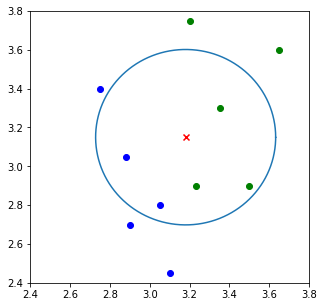

In [37]:
plt.figure(figsize=(5,5))
plt.xlim(2.4,3.8)
plt.ylim(2.4,3.8)
x=[ item[0] for item in features]
y=[ item[1] for item in features]

plt.scatter(x[:5],y[:5],c='b')
plt.scatter(x[5:],y[5:],c='g')
plt.scatter([3.18],[3.15],c='r',marker='x')
plt.plot(k_circle_x,k_circle_y)

### 特征的缩放

特征中量纲差距过大，导致其中一个或几个特征在计算中基本起不到作用，这是我们需要特征的缩放。方法如下：

线性归一化（Min-Max-Normalization）：一般情况Min=0，Max=1

标准差标准化（Z-Score-Normalization）


3.算法实现

算法大概可以用python进行封装成这个样子

In [12]:
import numpy as np
from math import  sqrt
from collections import  Counter


class KNNClassifier:

    def __init__(self,k):
        assert k>=1,"k must be valid"
        self.k = k
        self._X_train = None
        self._y_train = None

    def fit(self, X_train, y_train):
        """根据训练数据集X_train和y_train训练kNN分类器"""
        assert  X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k"

        self._X_train = X_train
        self._y_train = y_train
        return self

    def predict(self, X_predict):
        """给定待预测数据集X_predict, 返回表示X_predict的结果向量"""
        assert self._X_train is not None and self._y_train is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
            "the feature number of X_predict must be equal to X_train"

        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)

    def _predict(self, x):
        """给定单个待预测数据x,返回x的预测结果值"""
        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"

        distances = [sqrt(np.sum((x_train - x) ** 2))
                     for x_train in self._X_train]
        nearest = np.argsort(distances)
#         print(nearest)

        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)

#         print(votes.most_common)
        return votes.most_common(1)[0][0]

    def __repr__(self):
        return "KNN(k=%d)" % self.k


**实践**

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier

# 获得鸢尾花的数据集
iris = datasets.load_iris()

x = iris.data
y = iris.target


# 测试集与训练集分离，测试集为20%的总数据
X_train, X_test, y_train, y_test = \
    train_test_split(iris.data, iris.target, test_size=0.2)
# 对数据进行归一化处理
standarScaler = StandardScaler()
standarScaler.fit(X_train)

X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)

# 模型训练和测试
knn_clf = KNNClassifier(k=4)
knn_clf.fit(X_train_std,y_train)
score = knn_clf.predict(X_test_std)

print(score)

[1 0 0 2 0 2 1 0 1 0 2 0 0 2 1 0 0 1 0 2 0 0 0 0 1 2 2 0 2 1]


在python的机器学习库sciki-learn中，可以进行以下的方法进行调用

In [39]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 获得鸢尾花的数据集
iris = datasets.load_iris()

x = iris.data
y = iris.target

# 测试集与训练集分离，测试集为20%的总数据
X_train, X_test, y_train, y_test = \
    train_test_split(iris.data, iris.target, test_size=0.2)

# 对数据进行归一化处理
standarScaler = StandardScaler()
standarScaler.fit(X_train)

X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)

# 模型训练和测试
knn_clf = KNeighborsClassifier(n_neighbors=4)
knn_clf.fit(X_train_std,y_train)
score = knn_clf.score(X_test_std, y_test)

print(score)

0.9333333333333333
